# <font style="color:rgb(50,120,229)">Objective </font>
You have seen how we convert from one color space to another and also the theory behind the color spaces. In this assignment, you will implement the function cvtColor using the conversion formulae given in the opencv website. Specifically, you will be implementing the 2 functions:
1. convertBGRtoGray ( 10 points )
1. convertBGRtoHSV ( 20 points )

We have created the outline of the functions along with the supporting code. You just have to implement the formula in the function.

**Parameters**

**Input**
- BGR image ( named img )

**Output**
- Gray or HSV image

In [3211]:
import cv2
import matplotlib.pyplot as plt
# Import modules
import numpy as np

from dataPath import DATA_PATH
%matplotlib inline

In [3212]:
import matplotlib

matplotlib.rcParams['figure.figsize'] = (18.0, 12.0)
matplotlib.rcParams['image.interpolation'] = 'bilinear'

In [3213]:
# Supress warnings
import warnings

warnings.filterwarnings("ignore")

In [3214]:
img = cv2.imread(DATA_PATH + "images/sample.jpg")

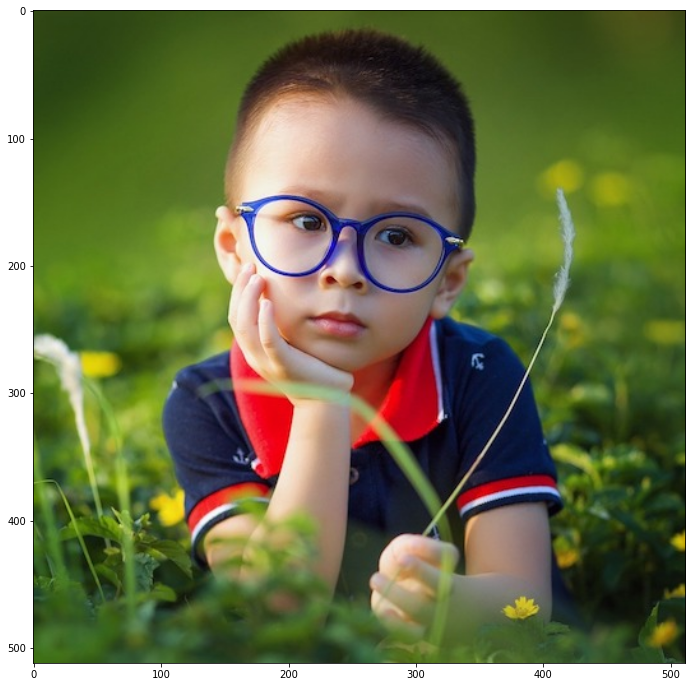

In [3215]:
plt.imshow(img[:, :, ::-1])
plt.show()

#### <font style="color:rgb(50,120,229)">Convert BGR image to Grayscale image</font>
- Input: image in BGR mode
- Output: image in grayscale mode

For your convenience, we have added the conversion formula below
![BGR to Gray formula](https://www.dropbox.com/s/2zuuigf5cpocs75/bgr2gray_formula.png?dl=1)

#### Reference: 
https://docs.opencv.org/4.1.0/de/d25/imgproc_color_conversions.html


In [3216]:
def convertBGRtoGray(image):
    b, g, r = cv2.split(image)
    return np.round(0.114 * b + 0.587 * g + 0.299 * r).astype(image.dtype)


In [3217]:
gray = convertBGRtoGray(img)
print(gray.dtype)

uint8


Get the result from OpenCV's `cvtColor` function to verify

In [3218]:
gray_cv = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray_cv.dtype)

uint8


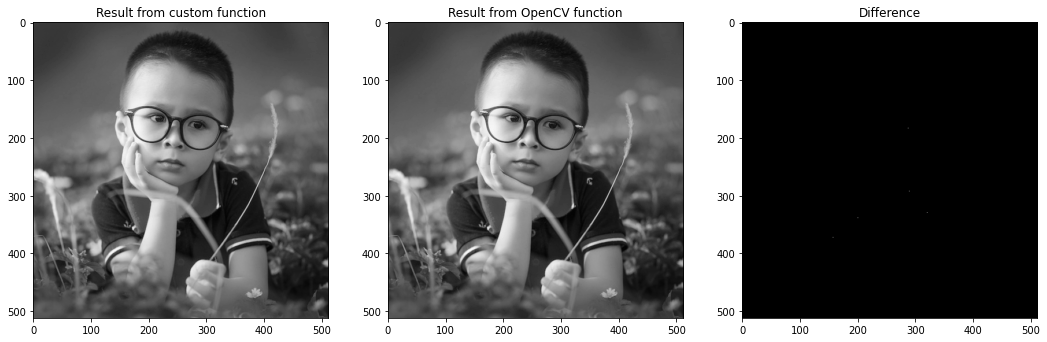

In [3219]:
plt.figure(figsize=(18, 12))
plt.subplot(1, 3, 1)
plt.title("Result from custom function")
plt.imshow(gray, cmap="gray")
plt.subplot(1, 3, 2)
plt.title("Result from OpenCV function")
plt.imshow(gray_cv, cmap="gray")
plt.subplot(1, 3, 3)
plt.title("Difference")
plt.imshow(np.abs(gray - gray_cv), cmap="gray")
plt.show()

In [3220]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### <font style="color:rgb(50,120,229)">Convert BGR image to HSV image</font>
- Input: image in BGR mode
- Output: image in HSV mode

For your convenience, we have added the conversion formula below
![BGR to HSV formula](https://www.dropbox.com/s/btdrk2qxd9knav1/bgr2hsv_formula.png?dl=1)

#### Reference: 
https://docs.opencv.org/4.1.0/de/d25/imgproc_color_conversions.html

You can assume we are working with 8 bit images.

In [3221]:
# hsvCv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
def convertBGRtoHSV(image):
    hsvCv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsvCv = np.float32(hsvCv) / 255.0

    imBGR = image.copy()
    imBGR = np.float32(imBGR) / 255.0

    b, g, r = cv2.split(imBGR)
    v = np.maximum.reduce([b.copy(), g.copy(),r.copy()])

    # vv = hsvCv[:,:,2].flatten() - v.flatten()
    # print(vv[vv>0])
    # print(f"V = {v}")

    minRGB = np.minimum.reduce([b.copy(), g.copy(),r.copy()])
    div = (v - minRGB)

    s = np.where(v == 0, 0, div / v)

    # print(f"S = {s}")
    # ss=hsvCv[:,:,1]*255.0 - s.flatten()*255.0
    # print(ss[ss>0])

    h = np.zeros([image.shape[0], image.shape[1]], np.float32)
    h = np.where(v == r, 60.0 * (g - b) / div, h)
    h = np.where(v == g, 120.0 + (60.0 * (b - r)) / div, h)
    h = np.where(v == b, 240.0 + (60.0 * (r - g)) / div, h)
    h = np.where(h < 0, h + 360.0, h)

    # print(f"H = {h}")
    # hh = hsvCv[:,:,0] - np.round((h/2.0))
    # print(hh[hh>0])

    imHSV = np.zeros(image.shape, np.uint8)
    imHSV[:, :, 0] = np.round(h / 2.0)
    imHSV[:, :, 1] = np.round(s * 255.0)
    imHSV[:, :, 2] = np.round(v * 255.0)

    # print(s)
    # hh = hsvCv[:,:,1]*255.0 - imHSV[:, :, 1]
    # print(hh[hh>0])

    return imHSV.astype(int)

# hsv = convertBGRtoHSV(img)
# print(hsv)
# hh = hsvCv[:,:,1] - hsv
# print(hh[hh>0])

In [3222]:
hsv = convertBGRtoHSV(img)
print(hsv.dtype)

int64


Get the result from OpenCV's `cvtColor` function to verify

In [3223]:
hsv_cv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
print(hsv_cv.dtype)

uint8


3597
2013
0


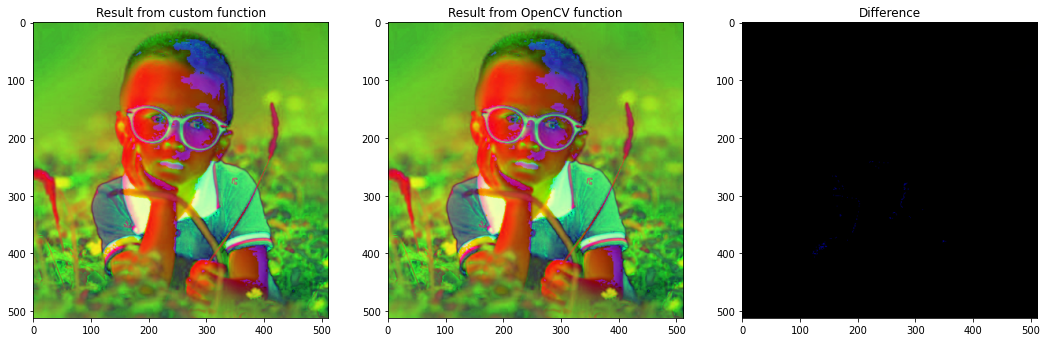

In [3224]:
h = hsv_cv[:, :, 0].flatten() - hsv[:, :, 0].flatten()
s = hsv_cv[:, :, 1].flatten() - hsv[:, :, 1].flatten()
v = hsv_cv[:, :, 2].flatten() - hsv[:, :, 2].flatten()
print(len(h[h > 0]))
print(len(s[s > 0]))
print(len(v[v > 0]))

plt.subplot(1, 3, 1)
plt.title("Result from custom function")
plt.imshow(hsv[:, :, ::-1])
plt.subplot(1, 3, 2)
plt.title("Result from OpenCV function")
plt.imshow(hsv_cv[:, :, ::-1])
plt.subplot(1, 3, 3)
plt.title("Difference")
plt.imshow(np.abs(hsv - hsv_cv)[:, :, ::-1])
plt.show()

In [3225]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
